In [1]:
import pandas as pd
import numpy as np
import urllib.request
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal as ps

In [2]:
df_case = pd.read_json("casebyzip.json")
df_case.head()

,count,zipcode
0,12,00083
1,1,07020
2,1,07030
3,3,07114
4,50,10000


In [3]:
df_case.dtypes

count       int64
zipcode    object
dtype: object

In [4]:
df_gen = pd.read_csv("gentrification.csv")
df_gen.head()

,zipcode,gentrification
0,10002,1
1,10003,1
2,10009,1
3,10026,1
4,10027,1


In [5]:
df_gen['zipcode'] = df_gen['zipcode'].astype("str")

In [6]:
df_gen.dtypes

zipcode           object
gentrification     int64
dtype: object

In [7]:
dfnew = df_case.merge(df_gen, on='zipcode', how='outer')
dfnew

,count,zipcode,gentrification
0,12,00083,NaN
1,1,07020,NaN
2,1,07030,NaN
3,3,07114,NaN
4,50,10000,NaN
5,4429,10001,NaN
6,3217,10002,1.0
7,5320,10003,1.0
8,831,10004,NaN
9,617,10005,NaN


In [8]:
dfnew[['gentrification']] = dfnew[['gentrification']].fillna(value=2)

In [9]:
dfnew

,count,zipcode,gentrification
0,12,00083,2.0
1,1,07020,2.0
2,1,07030,2.0
3,3,07114,2.0
4,50,10000,2.0
5,4429,10001,2.0
6,3217,10002,1.0
7,5320,10003,1.0
8,831,10004,2.0
9,617,10005,2.0


In [10]:
dfnew.describe()

,count,gentrification
count,238.000000,238.000000
mean,1164.205882,1.718487
std,1233.476834,0.559304
min,1.000000,0.000000
25%,109.750000,2.000000
50%,833.500000,2.000000
75%,1755.250000,2.000000
max,5585.000000,2.000000


In [11]:
df = dfnew[['zipcode','gentrification']]
df

,zipcode,gentrification
0,00083,2.0
1,07020,2.0
2,07030,2.0
3,07114,2.0
4,10000,2.0
5,10001,2.0
6,10002,1.0
7,10003,1.0
8,10004,2.0
9,10005,2.0


In [15]:
df.to_json("gentrification.json", orient='records')

In [12]:
urllib.request.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip', "file.gz")
os.system("mv " + "file.gz " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/file.gz -d " + os.getenv("PUIDATA") + "/zipcode")
nyc = gpd.read_file(os.getenv("PUIDATA") + "/zipcode" + "/ZIP_CODE_040114.shp")
nyc.drop(['BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'], axis=1, inplace=True)

nyc = nyc.merge(df, left_on='ZIPCODE', right_on='zipcode')
nyc.drop(['zipcode'], axis=1, inplace=True)

nycmap = gpd.GeoDataFrame(nyc)

In [13]:
nycmap.head()

,ZIPCODE,geometry,gentrification
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",2.0
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",1.0
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",1.0
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",1.0
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",2.0


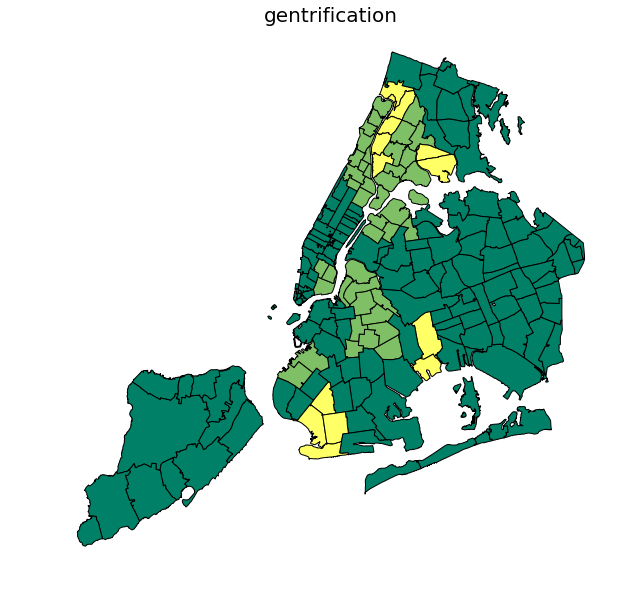

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
nycmap.plot(ax=ax, column='gentrification', cmap='summer_r', alpha=1, edgecolor="black", linewidth=1) 
ax.set_title("gentrification", fontsize=20)
ax.set_axis_off()
#leg = ax.get_legend()
#leg.set_bbox_to_anchor((0.1, 0.7, 0.2, 0.2))
plt.show()